## Capstone_Project_ Prabhash Ranjan

In [1]:
# 1.0 Call libraries
import numpy as np
import pandas as pd
import os, shutil
import matplotlib.pyplot as plt
import cv2
import os 
import warnings
warnings.filterwarnings('ignore')

from random import shuffle 
from tqdm import tqdm
from PIL import Image

In [2]:
original_dataset_dir = '/Users/prabhashranjan/Downloads/train/images'
base_dir = '/Users/prabhashranjan/Desktop/sat_project_june2020'
os.mkdir(base_dir)

In [3]:
#Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
#Directories with training labradoodle and chicken_nuggets picture

train_labradoodle_dir = os.path.join(train_dir, 'labradoodle')
os.mkdir(train_labradoodle_dir)
train_chicken_nuggets_dir = os.path.join(train_dir, 'chicken_nuggets')
os.mkdir(train_chicken_nuggets_dir)

In [5]:
#Directories with validation labradoodle and chicken_nuggets picture

validation_labradoodle_dir = os.path.join(validation_dir, 'labradoodle')
os.mkdir(validation_labradoodle_dir)
validation_chicken_nuggets_dir = os.path.join(validation_dir, 'chicken_nuggets')
os.mkdir(validation_chicken_nuggets_dir)

In [6]:
#Directories with test labradoodle and chicken_nuggets picture

test_labradoodle_dir = os.path.join(test_dir, 'labradoodle')
os.mkdir(test_labradoodle_dir)
test_chicken_nuggets_dir = os.path.join(test_dir, 'chicken_nuggets')
os.mkdir(test_chicken_nuggets_dir)

## Splitting Data into 
80 -Training,
10 - Validation,
10 - testing

In [7]:

#Copy the first 800 chicken_nuggets images to train_chicken_nuggets_dir
import os, shutil

fnames = ['chicken_nuggets.{}.jpg'.format(i+1) for i in range(800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_chicken_nuggets_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
#Copy the next 100 chicken_nuggets images to validation_chicken_nuggets_dir
fnames = ['chicken_nuggets.{}.jpg'.format(i) for i in range(801, 901)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_chicken_nuggets_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
#Copies the next 100 chicken_nuggets images to test_chicken_nuggets_dir
fnames = ['chicken_nuggets.{}.jpg'.format(i+1) for i in range(900, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_chicken_nuggets_dir, fname)
    shutil.copyfile(src, dst)

In [10]:

#Copy the first 800 labradoodle images to train_labradoodle_dir
import os, shutil

fnames = ['labradoodle.{}.jpg'.format(i+1) for i in range(800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_labradoodle_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#Copy the next 100 labradoodle images to validation_labradoodle_dir
fnames = ['labradoodle.{}.jpg'.format(i) for i in range(801, 901)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_labradoodle_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
#Copies the next 100 labradoodle images to test_labradoodle_dir
fnames = ['labradoodle.{}.jpg'.format(i+1) for i in range(900, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_labradoodle_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
print('total training chicken_nuggets images:', len(os.listdir(train_chicken_nuggets_dir)))

print('total training labradoodle images:', len(os.listdir(train_labradoodle_dir)))

print('total validation chicken_nuggets images:', len(os.listdir(validation_chicken_nuggets_dir)))

print('total validation labradoodle images:', len(os.listdir(validation_labradoodle_dir)))

print('total test chicken_nuggets images:', len(os.listdir(test_chicken_nuggets_dir)))

print('total test labradoodle images:', len(os.listdir(test_labradoodle_dir)))

total training chicken_nuggets images: 800
total training labradoodle images: 800
total validation chicken_nuggets images: 100
total validation labradoodle images: 100
total test chicken_nuggets images: 100
total test labradoodle images: 100


# Hence, we have 1600 training images , 200 validation images and 200 test images.
'''
Each split contains the same number of samples from each class: this is a balanced
binary-classification problem, which means classification accuracy will be an
appropriate measure of success.
'''

In [14]:
image_size = 128

## Labradoodle Image

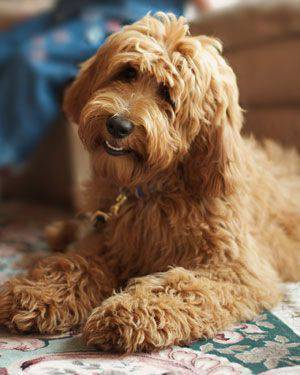

In [15]:
from IPython.display import Image

Image(filename= "//Users//prabhashranjan//Desktop//sat_project_june2020//train//labradoodle//labradoodle.777.jpg", width=300, height=300)


## Chicken_nuggets Image

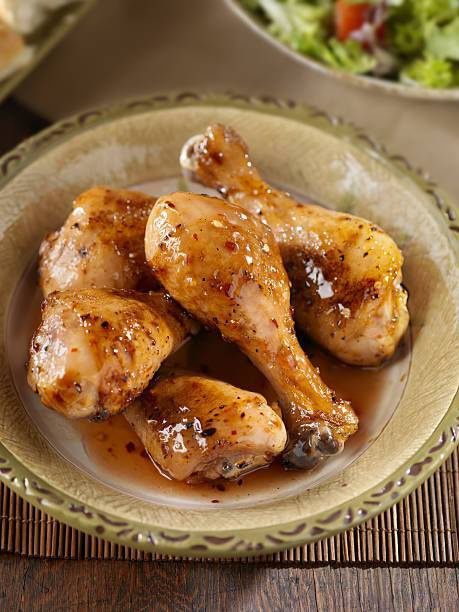

In [16]:
from IPython.display import Image

Image(filename= "//Users//prabhashranjan//Desktop//sat_project_june2020//train//chicken_nuggets//chicken_nuggets.42.jpg", width=300, height=300)


100%|██████████| 800/800 [00:15<00:00, 52.28it/s]


Text(0.5, 1.0, 'Labradoodle and Chicken_nuggets in GrayScale')

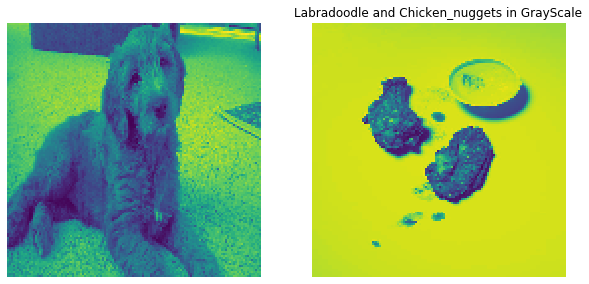

In [17]:
for image1 in tqdm(os.listdir(train_labradoodle_dir)):
    path = os.path.join(train_labradoodle_dir, image1)
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img1 = cv2.resize(img1,(image_size, image_size)).flatten()   
    np_img1=np.asarray(img1)
    
for image2 in tqdm(os.listdir(train_chicken_nuggets_dir)):
        path = os.path.join(train_chicken_nuggets_dir, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2,(image_size, image_size)).flatten() 
        np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img1.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Labradoodle and Chicken_nuggets in GrayScale")

## Data Preprocessing

In [19]:
def train_data():
    train_data_labradoodle = [] 
    train_data_chicken_nuggets=[]
    for image1 in tqdm(os.listdir(train_labradoodle_dir)): 
        path = os.path.join(train_labradoodle_dir, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_labradoodle.append(img1) 
    for image2 in tqdm(os.listdir(train_chicken_nuggets_dir)): 
        path = os.path.join(train_chicken_nuggets_dir, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_chicken_nuggets.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_labradoodle),np.asarray(train_data_chicken_nuggets)),axis=0)
    return train_data

In [20]:
def val_data():
    val_data_labradoodle = [] 
    val_data_chicken_nuggets=[]
    for image1 in tqdm(os.listdir(validation_labradoodle_dir)): 
        path = os.path.join(validation_labradoodle_dir, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        val_data_labradoodle.append(img1) 
    for image2 in tqdm(os.listdir(validation_chicken_nuggets_dir)): 
        path = os.path.join(validation_chicken_nuggets_dir, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        val_data_chicken_nuggets.append(img2) 
    
    val_data= np.concatenate((np.asarray(val_data_labradoodle),np.asarray(val_data_chicken_nuggets)),axis=0)
    return val_data

In [21]:
def testing_data():
    test_data_labradoodle = [] 
    test_data_chicken_nuggets=[]
    for image1 in tqdm(os.listdir(test_labradoodle_dir)): 
        path = os.path.join(test_labradoodle_dir, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_labradoodle.append(img1) 
    for image2 in tqdm(os.listdir(test_chicken_nuggets_dir)): 
        path = os.path.join(test_chicken_nuggets_dir, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_chicken_nuggets.append(img2) 
    
    testing_data= np.concatenate((np.asarray(test_data_labradoodle),np.asarray(test_data_chicken_nuggets)),axis=0)
    return testing_data

In [22]:
train_data = train_data() 
val_data = val_data()
testing_data= testing_data()

100%|██████████| 100/100 [00:02<00:00, 48.23it/s]


In [23]:
x_data=np.concatenate((train_data,val_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [24]:
z1 = np.zeros(800)
o1 = np.ones(800)
Y_train = np.concatenate((z1, o1), axis=0)
z = np.zeros(100)
o = np.ones(100)
Y_val = np.concatenate((z, o), axis=0)

In [25]:
y_data=np.concatenate((Y_train,Y_val),axis=0).reshape(x_data.shape[0],1)

In [26]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1800, 128, 128)
Y shape:  (1800, 1)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [28]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (1530, 16384)
X test flatten (270, 16384)


In [29]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 1530)
x test:  (16384, 270)
y train:  (1, 1530)
y test:  (1, 270)


##  Logistic Regression Method


In [32]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(C=1,penalty="l1", solver='liblinear')
log_reg.fit(x_train.T,y_train.T)
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
#print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))


train accuracy: 0.9947712418300654 


## Random Forest Method

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features=4, oob_score=True, random_state=1)
rfclf.fit(x_train.T, y_train.T)

print("train accuracy: {} ".format(rfclf.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))




train accuracy: 1.0 


## SGD Classifier method

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train.T, y_train.T)
print("train accuracy: {} ".format(sgd_clf.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


train accuracy: 0.9921568627450981 


## GradientBoosting Classifier Method

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=1, n_estimators=100, max_depth=3)
gbc.fit(x_train.T, y_train.T)
print("train accuracy: {} ".format(gbc.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


train accuracy: 0.9947712418300654 


# XGB Classifier Method

In [39]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train.T, y_train.T)
print("train accuracy: {} ".format(xgb_model.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


train accuracy: 1.0 


## AdaBoost Classifier


In [43]:
from sklearn.ensemble import AdaBoostClassifier
ADB_clf= AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0,random_state=7)
ADB_clf.fit(x_train.T, y_train.T)
print("train accuracy: {} ".format(ADB_clf.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

train accuracy: 0.8431372549019608 


## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train.T, y_train.T)
print("train accuracy: {} ".format(tree_clf.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

train accuracy: 0.6607843137254902 


##  Top Five the best performing models on training set using accuracy score as:

#####  Logistic Regression Training Accuracy = 0.9947712418300654
##### Random Forest Training Accuracy= 1.0
##### SGD Classifier Training Accuracy= 0.9921568627450981
##### GradientBoosting Classifier Training Accuracy= 0.9947712418300654
##### XGB Classifier Training Accuracy= 1.0

++++++++++++++++++++++++++++++++++++++++++++=

##### AdaBoost Classifier Training Accuracy= 0.8431372549019608
##### Decision Tree Classifier Training Accuracy= 0.6607843137254902


## Applying above 5 models to the validation set


In [48]:
log_reg_Predicted= log_reg.predict(x_test.T)

# Access accuracy

from sklearn import metrics
print('Validation Accuracy =', metrics.accuracy_score(y_test.T, log_reg_Predicted))
print('ROC_AUC : ', metrics.roc_auc_score(y_test.T, log_reg_Predicted))

Validation Accuracy = 0.5962962962962963
ROC_AUC :  0.5956979806848113


In [49]:
randomForestPredicted = rfclf.predict(x_test.T)

# Access accuracy

from sklearn import metrics
print('Validation Accuracy =', metrics.accuracy_score(y_test.T, randomForestPredicted))
print('ROC_AUC : ', metrics.roc_auc_score(y_test.T, randomForestPredicted))

Validation Accuracy = 0.7925925925925926
ROC_AUC :  0.7931299385425812


In [50]:
sgdClassifierPredicted= sgd_clf.predict(x_test.T)
from sklearn import metrics
print('Validation Accuracy =', metrics.accuracy_score(y_test.T, sgdClassifierPredicted))
print('ROC_AUC : ', metrics.roc_auc_score(y_test.T, sgdClassifierPredicted))

Validation Accuracy = 0.5666666666666667
ROC_AUC :  0.5658472344161546


In [51]:
gbc_Predicted= gbc.predict(x_test.T)
print('Validation Accuracy =', metrics.accuracy_score(y_test.T, gbc_Predicted))
print('ROC_AUC : ', metrics.roc_auc_score(y_test.T, gbc_Predicted))

Validation Accuracy = 0.7555555555555555
ROC_AUC :  0.7555970149253731


In [52]:
xgb_model_Predicted= xgb_model.predict(x_test.T)
print('Validation Accuracy =', metrics.accuracy_score(y_test.T, xgb_model_Predicted))
print('ROC_AUC : ', metrics.roc_auc_score(y_test.T, xgb_model_Predicted))

Validation Accuracy = 0.7592592592592593
ROC_AUC :  0.7591088674275681


## Best performing of top3 models on the validation set:

#RandomForest Validation Accuracy = 0.7925925925925926
#GradientBoosting Validation Accuracy = 0.7555555555555555
#xgboost Validation Accuracy = 0.7592592592592593




## Hyperparameters optimization to find the best performing settings for model using Using GridSearchCV / RandomSearchCV; 



## RandomForest Model Optimization

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfclf = RandomForestClassifier(random_state=1)
rfclf_cv=GridSearchCV(estimator=rfclf, param_grid=param_grid, cv= 3)
rfclf_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [54]:
print("best hyperparameters: ", rfclf_cv.best_params_)
print("accuracy: ", rfclf_cv.best_score_)

best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500}
accuracy:  0.7411764705882353


## Gradient Boosting Optimization

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


random_search = {
 "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbc = GradientBoostingClassifier()
gbc_cv = RandomizedSearchCV(estimator = gbc, param_distributions = random_search, n_iter = 80, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
gbc_cv.fit(x_train.T,y_train.T)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 12.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [58]:
print("best hyperparameters: ", gbc_cv.best_params_)
print("accuracy: ", gbc_cv.best_score_)

best hyperparameters:  {'subsample': 1.0, 'n_estimators': 10, 'min_samples_split': 0.2090909090909091, 'min_samples_leaf': 0.13636363636363638, 'max_features': 'sqrt', 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
accuracy:  0.6764705882352942


## XGBClassifier optimization

In [59]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score



In [60]:
# A parameter grid for XGBoost
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [61]:
xgb_model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb_model_cv= RandomizedSearchCV(XGBClassifier(), parameters, cv=10, n_jobs=-1)
xgb_model_cv.fit(x_train.T,y_train.T)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                  

In [62]:
print("best hyperparameters: ", xgb_model_cv.best_params_)
print("accuracy: ", xgb_model_cv.best_score_)

best hyperparameters:  {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}
accuracy:  0.7464052287581698


## Neural Network( Logistic Regression)


In [158]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100)))

Cost after iteration 0: nan
Cost after iteration 100: 0.649177
Cost after iteration 200: 0.622439
Cost after iteration 300: 0.612841
Cost after iteration 400: 0.605504
Cost after iteration 500: 0.599389
Cost after iteration 600: 0.594047
Cost after iteration 700: 0.589228
Cost after iteration 800: 0.584789
Cost after iteration 900: 0.580639
Cost after iteration 1000: 0.576719
Cost after iteration 1100: 0.572990
Cost after iteration 1200: 0.569423
Cost after iteration 1300: 0.565995
Cost after iteration 1400: 0.562691


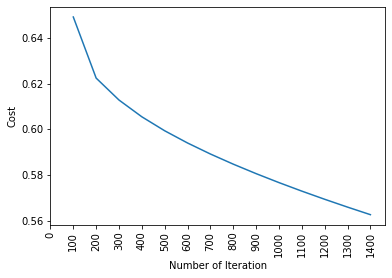

Test Accuracy: 61.0 %
Train Accuracy: 71.0 %


In [159]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 1500)

## CNN CLASSIFICATION

In [160]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [161]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [162]:
#Data preprocessing
#Using ImageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
Final_test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
            train_dir,             #Target directory
            target_size=(150, 150), #Resizes all images to 150 × 150
            batch_size=20,
            class_mode='binary') #Because we use binary_crossentropy loss,
			                     # we need binary labels.

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
			target_size=(150, 150),
            batch_size=20,
            class_mode='binary')


test_generator = Final_test_datagen.flow_from_directory(
            test_dir,
			target_size=(150, 150),
            batch_size=20,
            class_mode='binary')


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [163]:
# Let’s look at the output of one of these generators

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [164]:
# Fit the model to the data using the generator.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)


model.save('labradoodle_and_chicken_nuggets.h5')

Epoch 1/20
100/100 [==============================] - 102s 1s/step - loss: 0.4979 - acc: 0.7465 - val_loss: 0.3755 - val_acc: 0.8450
Epoch 2/20
100/100 [==============================] - 127s 1s/step - loss: 0.3611 - acc: 0.8455 - val_loss: 0.2805 - val_acc: 0.8750
Epoch 3/20
100/100 [==============================] - 116s 1s/step - loss: 0.3107 - acc: 0.8700 - val_loss: 0.4170 - val_acc: 0.9100
Epoch 4/20
100/100 [==============================] - 117s 1s/step - loss: 0.2755 - acc: 0.8855 - val_loss: 0.1156 - val_acc: 0.9100
Epoch 5/20
100/100 [==============================] - 120s 1s/step - loss: 0.2541 - acc: 0.8990 - val_loss: 0.1834 - val_acc: 0.9000
Epoch 6/20
100/100 [==============================] - 115s 1s/step - loss: 0.2358 - acc: 0.9080 - val_loss: 0.3121 - val_acc: 0.8750
Epoch 7/20
100/100 [==============================] - 114s 1s/step - loss: 0.2064 - acc: 0.9085 - val_loss: 0.0791 - val_acc: 0.9150
Epoch 8/20
100/100 [==============================] - 114s 1s/step - 

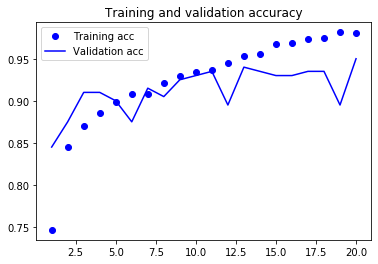

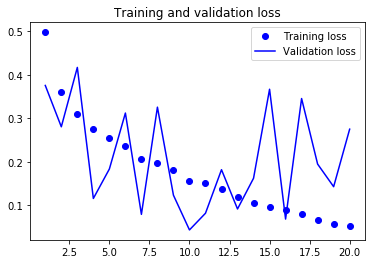

In [165]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### COMMENTS: - This Capstone Project for Image classification was a great learning experience. It gave me opportunity to get ready and sum up all my classroom learning and assignments experience to apply in to the final project of Big data Analytics Program. With given image data, I learned how to do data pre-processing and splitting datasets into train, validation and test. I learned to build models on training sets and experimented with validation sets. I also did hyper-parameter tuning of the models to optimize the models and found RandomForest model with approximately 80% accuracy in sklearn and 90% above accuracy with CNN model. Thank you!

